<a href="https://colab.research.google.com/github/BrunoASNascimento/bootcamp-datascience-alura/blob/main/Bruno_Araujo_Santos_do_Nascimento_m1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo da correlação da poluição atmosféricas com o número de internações por problemas respiratórios

#Resumo

As analises consistem em fazer o estudo entre a qualidade do e o numero de internações pelas enfermidades: outras tuberculoses respiratórias, restante de tuberculose respiratória, outras neoplasias malignas do aparelho respiratório e dos órgãos intratorácicos, outras doenças do trato respiratório superior, outras doenças do aparelho respiratório, outros transtornos cardiovasculares originados no período perinatal.

**Levantando a hipótese: conforme há uma piora na qualidade do ar de uma determinada região, o número de internações pelas enfermidades listada acima aumentam?**

#Fontes

Cetesb: https://servicos.cetesb.sp.gov.br/qa/

DataSUS: https://datasus.saude.gov.br/informacoes-de-saude-tabnet/

#Imports
Área reservada para imports e variáveis globais.

In [ ]:
import os
import pandas as pd
import numpy as np
from urllib.parse import quote
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set_theme(style="darkgrid")

# Cetesb
Companhia Ambiental do Estado de São Paulo

A Cetesb é a agência ambiental paulista responsável pelo desenvolvimento de ações de controle, licenciamento, fiscalização e monitoramento das atividades potencialmente poluidoras. Essas ações estão voltadas para a promoção, proteção e a recuperação da qualidade do ar, das águas e do solo.

Os dados foram coletados através de um script externo, para mais detalhes consultar: https://github.com/BrunoASNascimento/estudo-da-correlacao-da-poluicao-atmosfericas-com-os-gastos-no-sus/blob/main/get_data_cetesb.py


## Configuração de leitura de dados Cetesb

Área destinada para fazer a configuração para leitura dos arquivos da Cetesb, podem ler local, ou de um repositório público no GitHub.

In [ ]:
try:
    print('Try local upload documents')
    dir_cetesb = 'data\cetesb'
    cetesb_files = os.listdir(dir_cetesb)
    print('Get local documents')
except:
    print('Get in github')
    cetesb_files = [
                    'cetesb_1-Parque D.Pedro II.csv', 'cetesb_17-Osasco.csv', 'cetesb_27-Pinheiros.csv', 'cetesb_29-Grajaú-Parelheiros.csv', 'cetesb_33-Itaim Paulista.csv',
                    'cetesb_36-Marg.Tietê-Pte Remédios.csv', 'cetesb_40-Guarulhos-Pimentas.csv', 'cetesb_41-Campinas-Taquaral.csv', 'cetesb_48-Paulínia-Sta Terezinha.csv', 'cetesb_56-S.José Campos-Jd.Satelite.csv',
                    'cetesb_58-Taubaté.csv', 'cetesb_62-Guaratinguetá.csv', 'cetesb_64-Limeira.csv', 'cetesb_7-São Caetano do Sul.csv', 'cetesb_74-Jundiaí.csv', 'cetesb_77-Piracicaba.csv',
                    'cetesb_8-Congonhas.csv', 'cetesb_80-São José do Rio Preto.csv', 'cetesb_83-Santos-Ponta da Praia.csv', 'cetesb_84-Ribeirão Preto.csv'
    ]

Try local upload documents
Get local documents


## Função para fazer a limpeza dos dados

In [ ]:
def clean_data_cetesb(df):    
    df.rename(columns={
        'MP10 µg/m³|Média  horária': 'MP10_hourly_mean',
        'MP10 µg/m³|Média  24 h': 'MP10_daily_mean', 
        'MP10 µg/m³|Índice /  Qualidade': 'MP10_index',
        'MP2.5 µg/m³|Média  horária': 'MP25_hourly_mean', 
        'MP2.5 µg/m³|Média  24 h': 'MP25_daily_mean',
        'MP2.5 µg/m³|Índice /  Qualidade': 'MP25_index'
    }, inplace=True)
    df.loc[df['Hora']=='24:00','Hora'] = '0:00'
    df['station_time'] = pd.to_datetime(df['Data']+' '+df['Hora'])
    return df

## Função para calcular o otif dos dados coletados

Como as estações da Cetesb, são hardwares e podem ter falhas (como de comunicação, falta de energia etc.), é necessário fazer a verificação dos dados, para ver a qualidade deles e porcentagem de perda, para utilizar uma região que contenha um número de dados expressivo para amostra.

In [ ]:
def otif_cetesb(station):
    try:
        df = pd.read_csv(f"{dir_cetesb}\{station}")
    except:
        url = f"https://raw.githubusercontent.com/BrunoASNascimento/estudo-da-correlacao-da-poluicao-atmosfericas-com-os-gastos-no-sus/main/data/cetesb/{quote(station)}"
        # print(url)
        df = pd.read_csv(url)
        df.drop_duplicates(inplace=True)
    clean_data_cetesb(df)
    theoretical_data_size = len(pd.date_range(start=df['station_time'].min(), end=df['station_time'].max(), freq='h'))     

    data = {
        'station': df['station_name'][0],
        'name_file': station,
        'otif_MP10': len(df['MP10_index'].dropna())/theoretical_data_size,
        'otif_MP25': len(df['MP25_index'].dropna())/theoretical_data_size,
    }

    return data

## DataFrame sobre os otifs MP10 e MP2.5

In [ ]:
df_otif = pd.DataFrame([
    otif_cetesb(info_cetesb)
    for info_cetesb in cetesb_files
    ])
df_otif

,station,name_file,otif_MP10,otif_MP25
0,Parque D.Pedro II,cetesb_1-Parque D.Pedro II.csv,0.824208,0.360889
1,Osasco,cetesb_17-Osasco.csv,0.857944,0.309931
2,Pinheiros,cetesb_27-Pinheiros.csv,0.468278,0.575389
3,Grajaú-Parelheiros,cetesb_29-Grajaú-Parelheiros.csv,0.801347,0.738625
4,Itaim Paulista,cetesb_33-Itaim Paulista.csv,0.726014,0.402667
5,Marg.Tietê-Pte Remédios,cetesb_36-Marg.Tietê-Pte Remédios.csv,0.852806,0.791653
6,Guarulhos-Pimentas,cetesb_40-Guarulhos-Pimentas.csv,0.437861,0.464861
7,Campinas-Taquaral,cetesb_41-Campinas-Taquaral.csv,0.530875,0.000000
8,Paulínia-Sta Terezinha,cetesb_48-Paulínia-Sta Terezinha.csv,0.247153,0.131014
9,S.José Campos-Jd.Satelite,cetesb_56-S.José Campos-Jd.Satelite.csv,0.524681,0.527167


## Otif_MP10 >= 75%

Pontos do MP10 com mais de 75% dos dados.

Vale ressaltar que partículas inaláveis (MP10)

Podem ser definidas de maneira simplificada como aquelas cujo diâmetro aerodinâmico é menor ou igual a 10 µm. Dependendo da distribuição de tamanho na faixa de 0 a 10 µm, podem ficar retidas na parte superior do sistema respiratório ou penetrar mais profundamente, alcançando os alvéolos pulmonares.

In [ ]:
df_otif[df_otif['otif_MP10']>=0.75].reset_index(drop=True)

,station,name_file,otif_MP10,otif_MP25
0,Parque D.Pedro II,cetesb_1-Parque D.Pedro II.csv,0.824208,0.360889
1,Osasco,cetesb_17-Osasco.csv,0.857944,0.309931
2,Grajaú-Parelheiros,cetesb_29-Grajaú-Parelheiros.csv,0.801347,0.738625
3,Marg.Tietê-Pte Remédios,cetesb_36-Marg.Tietê-Pte Remédios.csv,0.852806,0.791653
4,São Caetano do Sul,cetesb_7-São Caetano do Sul.csv,0.821278,0.247681
5,Jundiaí,cetesb_74-Jundiaí.csv,0.858833,0.162028
6,Piracicaba,cetesb_77-Piracicaba.csv,0.828819,0.830306
7,Congonhas,cetesb_8-Congonhas.csv,0.854819,0.827014
8,São José do Rio Preto,cetesb_80-São José do Rio Preto.csv,0.858597,0.821986
9,Santos-Ponta da Praia,cetesb_83-Santos-Ponta da Praia.csv,0.864583,0.854278


## Otif_MP2.5 >= 75%

Pontos do MP10 com mais de 75% dos dados.

Vale ressaltar que partículas inaláveis finas (MP2,5)

Podem ser definidas de maneira simplificada como aquelas cujo diâmetro aerodinâmico é menor ou igual a 2,5 µm. or causa do seu tamanho diminuto, penetram profundamente no sistema respiratório, podendo atingir os alvéolos pulmonares.

In [ ]:
df_otif[df_otif['otif_MP25']>=0.75].reset_index(drop=True)

,station,name_file,otif_MP10,otif_MP25
0,Marg.Tietê-Pte Remédios,cetesb_36-Marg.Tietê-Pte Remédios.csv,0.852806,0.791653
1,Piracicaba,cetesb_77-Piracicaba.csv,0.828819,0.830306
2,Congonhas,cetesb_8-Congonhas.csv,0.854819,0.827014
3,São José do Rio Preto,cetesb_80-São José do Rio Preto.csv,0.858597,0.821986
4,Santos-Ponta da Praia,cetesb_83-Santos-Ponta da Praia.csv,0.864583,0.854278


## Indice de qualidade do ar

![alt text](https://i.ibb.co/ypm47Gj/estrutura-do-indice-de-qualidade-do-ar.png)

Baseado no índice, e como forma de normalizar os dados consideramos os valore **menores ou iguais a 40 como bons** e **acima de 40 como valores ruins**.

Nesse ponto há a normalização dos dados horarios para mensais, visto que para o data SUS tem essa granularidade (mês e ano). A normalização foi feita baseada  no número de pontos com qualidade do ar boa e ruim, sobre o número total de dados no período, com isso temos um índice mensal da qualidade do ar considerando todos os dados e não a média do período.

In [ ]:
def air_quality_index(df, mp_type):
    df['year'] = df['station_time'].dt.year
    df['month'] = df['station_time'].dt.month
    df.drop(columns=[
        'Hora', 'Data',
        'MP10_hourly_mean', 'MP10_daily_mean',
        'MP25_hourly_mean', 'MP25_daily_mean',
        'station_time'
    ], inplace=True)

    filter_value = ['year', 'month', 'station_name']

    result = pd.merge(
        df[filter_value].drop_duplicates(),
        df[df[mp_type] <= 40].groupby(
            filter_value,
            as_index=False
        )[mp_type].count().rename(columns={
            mp_type: 'air_quality_good'
        }
        ),
        how='left',
        on=filter_value
    ).merge(
        df[df[mp_type] > 40].groupby(
            filter_value,
            as_index=False
        )[mp_type].count().rename(columns={
            mp_type: 'air_quality_bad'
        }
        ),
        how='left',
        on=filter_value).merge(
            df.groupby(filter_value)[mp_type].count(
            ).reset_index(name='control'),
            how='left',
        on=filter_value
    ).fillna(0)
    
    # Normalization
    result = result[result['control'] > 0]
    result['air_quality_good_normalizated'] = (
        result['air_quality_good'] / result['control'])
    result['air_quality_bad_normalizated'] = (
        result['air_quality_bad'] / result['control'])
    result['MP_TYPE'] = mp_type

    return result

## Filtrando Município
Baseado nas análises de otif e localização da estação no município, foi selecionado o município de Piracicaba para analise aprofundada os dados de qualidade do ar e internações.

In [ ]:
filter_country = df_otif[df_otif['station']=='Piracicaba']
station, name_file = filter_country['station'].values[0], filter_country['name_file'].values[0]
station, name_file

('Piracicaba', 'cetesb_77-Piracicaba.csv')

## Pegando os dados e organizando

Foi selecionado o MP25 por se tratar de uma partícula mais fina e que pode trazer problemas no sistema respiratório.


In [ ]:
df = clean_data_cetesb(pd.read_csv(f"{dir_cetesb}\{name_file}"))
result = air_quality_index(df, 'MP25_index')
result['year_month'] =   (result['year'].astype(str)+'/' +result['month'].astype(str).str.zfill(2))
result.sort_values(by='year_month',inplace=True,ascending=True)
result=result.reset_index(drop=True)
result.head(20)

,year,month,station_name,air_quality_good,air_quality_bad,control,air_quality_good_normalizated,air_quality_bad_normalizated,MP_TYPE,year_month
0,2012,8,Piracicaba,48,0.0,48,1.000000,0.000000,MP25_index,2012/08
1,2012,9,Piracicaba,720,0.0,720,1.000000,0.000000,MP25_index,2012/09
2,2012,10,Piracicaba,744,0.0,744,1.000000,0.000000,MP25_index,2012/10
3,2012,11,Piracicaba,720,0.0,720,1.000000,0.000000,MP25_index,2012/11
4,2012,12,Piracicaba,463,0.0,463,1.000000,0.000000,MP25_index,2012/12
5,2013,1,Piracicaba,626,0.0,626,1.000000,0.000000,MP25_index,2013/01
6,2013,2,Piracicaba,498,0.0,498,1.000000,0.000000,MP25_index,2013/02
7,2013,3,Piracicaba,744,0.0,744,1.000000,0.000000,MP25_index,2013/03
8,2013,4,Piracicaba,684,36.0,720,0.950000,0.050000,MP25_index,2013/04
9,2013,5,Piracicaba,563,181.0,744,0.756720,0.243280,MP25_index,2013/05


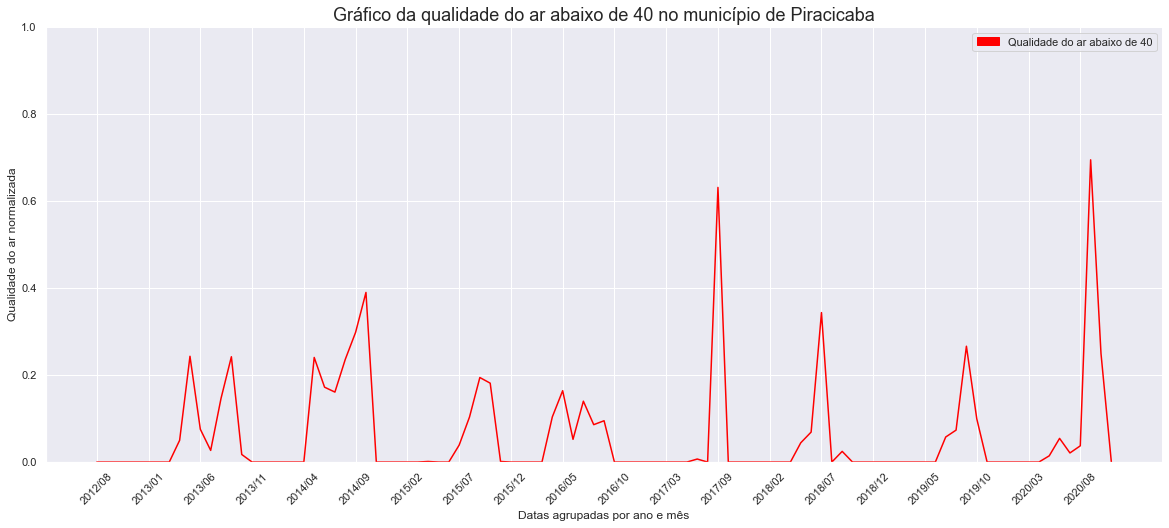

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.set(ylim=(0, 1))

# leg_good = mpatches.Patch(color='green', label='air_quality_good_normalizated')
leg_bad = mpatches.Patch(color='red', label='Qualidade do ar abaixo de 40')

# img = sns.lineplot(
#     data=result,
#     x='year_month',
#     y='air_quality_good_normalizated',
#     color='green',
#     ax=ax
# )
sns.lineplot(
    data=result,
    x='year_month',
    y='air_quality_bad_normalizated',
    color='red',
    ax=ax
)
plt.legend(handles=[leg_bad]) #leg_good
plt.xticks([result['year_month'][i] for i in range(0,result['year_month'].shape[0],5)],rotation=45)
plt.title(f'Gráfico da qualidade do ar abaixo de 40 no município de {station}',fontdict={'fontsize': 18})
plt.xlabel('Datas agrupadas por ano e mês')
plt.ylabel('Qualidade do ar normalizada')
sns.despine()

## Top 5  máximas de qualidade do ar ruim

In [ ]:
result.sort_values(by='air_quality_bad_normalizated',ascending=False).head(5)

,year,month,station_name,air_quality_good,air_quality_bad,control,air_quality_good_normalizated,air_quality_bad_normalizated,MP_TYPE,year_month
96,2020,9,Piracicaba,129,294.0,423,0.304965,0.695035,MP25_index,2020/09
60,2017,9,Piracicaba,126,216.0,342,0.368421,0.631579,MP25_index,2017/09
26,2014,10,Piracicaba,444,284.0,728,0.609890,0.390110,MP25_index,2014/10
70,2018,7,Piracicaba,126,66.0,192,0.656250,0.343750,MP25_index,2018/07
25,2014,9,Piracicaba,369,157.0,526,0.701521,0.298479,MP25_index,2014/09


# Data SUS


## Função para coleta dos dados previamente baixados do Data SUS

In [ ]:
def read_data_sus(path):
    df = pd.read_csv(
        path,
        sep=';',
        skiprows=4,
        skipfooter=12,
        encoding='ISO-8859-1',
        thousands=".",
        decimal=","
    )
    df.drop_duplicates(inplace=True)
    df.replace('-',np.nan,inplace=True)
    df[df.columns[1:]]=df[df.columns[1:]].astype("float")
    return df

## Leitura do dado do Data SUS

Área destinada para fazer a configuração para leitura dos arquivos do data SUS sobre o numero de internações pelas enfermidades: outras tuberculoses respiratórias, restante de tuberculose respiratória, outras neoplasias malignas do aparelho respiratório e dos órgãos intratorácicos, outras doenças do trato respiratório superior, outras doenças do aparelho respiratório, outros transtornos cardiovasculares originados no período perinatal.

In [ ]:
try:
    df_hospitalizations = read_data_sus('data/sus/internacoes.csv')
except:
    df_hospitalizations = read_data_sus('https://raw.githubusercontent.com/BrunoASNascimento/estudo-da-correlacao-da-poluicao-atmosfericas-com-os-gastos-no-sus/main/data/sus/internacoes.csv')
df_hospitalizations.head() 

<ipython-input-453-cf3a02ed6a70>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


,Município,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,...,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,Total
0,110001 Alta Floresta D'Oeste,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,21.0,...,6.0,5.0,5.0,6.0,3.0,NaN,6.0,5.0,2.0,1494.0
1,110037 Alto Alegre dos Parecis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,1.0,1.0,NaN,1.0,1.0,NaN,NaN,3.0,NaN,418.0
2,110040 Alto Paraíso,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,...,3.0,NaN,3.0,1.0,2.0,2.0,2.0,NaN,3.0,249.0
3,110034 Alvorada D'Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,202.0
4,110002 Ariquemes,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,13.0,...,14.0,23.0,22.0,9.0,20.0,11.0,2.0,1.0,NaN,2097.0


## Transformação do mês escrito para o numérico

Essa transformação é necessária para podermos fazer a comparação e junção com os dados da Cetesb.

In [ ]:
to_month_num = {
    'Jan':'01',
    'Fev':'02',
    'Mar':'03',
    'Abr':'04',
    'Mai':'05',
    'Jun':'06',
    'Jul':'07',
    'Ago':'08',
    'Set':'09',
    'Out':'10',
    'Nov':'11',
    'Dez':'12'
}

rename_date={}
for old_date in df_hospitalizations.columns[1:len(df_hospitalizations.columns)-1]:
    rename_date.update({old_date : old_date[:5]+to_month_num[old_date[5:]]})  

## Limpeza dos dados data SUS

É feita a quebra dos municípios com o código do IBGE e seu nome em duas colunas, também é feita a retirada da coluna de totais.

In [ ]:
df_hospitalizations.drop(columns=['Total'],inplace=True, errors='ignore')
df_hospitalizations.rename(columns=rename_date,inplace=True)
df_hospitalizations[['code_ibge','Município']]=df_hospitalizations['Município'].str.split(" ", 1, expand=True)
df_hospitalizations.head()

,Município,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,...,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,code_ibge
0,Alta Floresta D'Oeste,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,21.0,...,6.0,5.0,5.0,6.0,3.0,NaN,6.0,5.0,2.0,110001
1,Alto Alegre dos Parecis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,1.0,1.0,NaN,1.0,1.0,NaN,NaN,3.0,NaN,110037
2,Alto Paraíso,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,...,3.0,NaN,3.0,1.0,2.0,2.0,2.0,NaN,3.0,110040
3,Alvorada D'Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,110034
4,Ariquemes,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,13.0,...,14.0,23.0,22.0,9.0,20.0,11.0,2.0,1.0,NaN,110002


In [ ]:
df_hospitalizations.tail()

,Município,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,...,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,code_ibge
5560,Uruaçu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,12.0,...,5.0,2.0,6.0,3.0,1.0,2.0,1.0,1.0,2.0,522160
5561,Uruana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,12.0,...,1.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,522170
5562,Urutaí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522180
5563,Valparaíso de Goiás,NaN,NaN,NaN,NaN,2.0,9.0,1.0,3.0,7.0,...,12.0,24.0,26.0,4.0,8.0,11.0,7.0,13.0,4.0,522185
5564,Varjão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,522190


## Transformação dos dados e normalização

Para efetuar a normalização dos dados foi utilizado o método min-max:

![Método min-max](https://miro.medium.com/max/202/1*9N7QdpE_CfvkTyirk7_oWw.png)

In [ ]:
county = station
df_hospitalizations_analysis = pd.DataFrame()

df_hospitalizations_analysis = df_hospitalizations[df_hospitalizations.columns[:-1]][df_hospitalizations['Município']==county].T #Transpose
df_hospitalizations_analysis.rename(columns=df_hospitalizations_analysis.iloc[0],inplace=True)
df_hospitalizations_analysis.drop(df_hospitalizations_analysis.index[0], inplace = True)
df_hospitalizations_analysis= df_hospitalizations_analysis.reset_index().rename(columns={'index':'year_month'})
df_hospitalizations_analysis[county]=df_hospitalizations_analysis[county].astype("float")
df_hospitalizations_analysis[f'{county}_norm'] = ((df_hospitalizations_analysis[county]-df_hospitalizations_analysis[county].min())/(df_hospitalizations_analysis[county].max()-df_hospitalizations_analysis[county].min())) #Normalization
df_hospitalizations_analysis.head(10)

,year_month,Piracicaba,Piracicaba_norm
0,2011/05,NaN,NaN
1,2011/06,NaN,NaN
2,2011/07,1.0,0.000000
3,2011/08,NaN,NaN
4,2011/09,1.0,0.000000
5,2011/10,8.0,0.079545
6,2011/11,23.0,0.250000
7,2011/12,27.0,0.295455
8,2012/01,46.0,0.511364
9,2012/02,32.0,0.352273


## Gráfico da qualidade do ar abaixo de 40 e o número de internações normalizado

Temos o gráfico das duas grandezas que queremos analisar, é possível ver algumas similaridades entre alguns cortes de datas como em abril de 2014 e março de 2016, entretanto o pico de qualidade do ar ruim é em setembro de 2017 e o pico de internações é em agosto de 2015. Mostrando que se há uma correlação ela pode ser baixa ou as enfermidades listadas não são tão afetadas pela MP10.


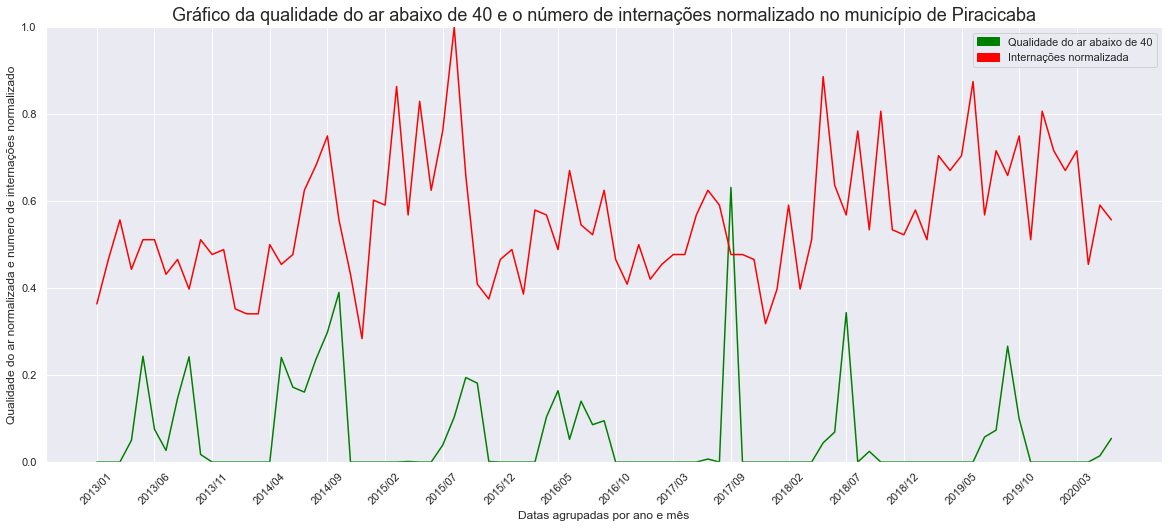

In [ ]:
df_hospitalizations_analysis_plot = df_hospitalizations_analysis[(df_hospitalizations_analysis['year_month']>='2013')&(df_hospitalizations_analysis['year_month'].isin(result['year_month'].values[:-5]))].reset_index(drop=True)
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.set(ylim=(0, 1))

leg_good = mpatches.Patch(color='green', label='Qualidade do ar abaixo de 40')
leg_bad = mpatches.Patch(color='red', label='Internações normalizada')

img = sns.lineplot(
    data=result[(result['year_month']>='2013')&(result['year_month'].isin(result['year_month'].values[:-5]))],
    x='year_month',
    y='air_quality_bad_normalizated',
    color='green',
    ax=ax
)
sns.lineplot(
    data=df_hospitalizations_analysis_plot,
    x='year_month',
    y=f'{county}_norm',
    color='red',
    ax=ax
)
plt.legend(handles=[leg_good,leg_bad])
plt.xticks([df_hospitalizations_analysis_plot['year_month'][i] for i in range(0,df_hospitalizations_analysis_plot['year_month'].shape[0],5)],rotation=45)
plt.title(f'Gráfico da qualidade do ar abaixo de 40 e o número de internações normalizado no município de {station}',fontdict={'fontsize': 18})
plt.xlabel('Datas agrupadas por ano e mês')
plt.ylabel('Qualidade do ar normalizada e numero de internações normalizado')
sns.despine()

## Junção dos dados da Cetesb e do Data SUS

Essa junção é feita para fazer o estudo de casos médios com a qualidade do ar abaixo de 40. 

In [ ]:
df_air_with_hospitalizations =result.merge(df_hospitalizations_analysis[(df_hospitalizations_analysis['year_month']>='2013')&(df_hospitalizations_analysis['year_month'].isin(result['year_month'].values[:-5]))],on='year_month').sort_values(by='year_month',ascending=True)
df_air_with_hospitalizations.head(10)

,year,month,station_name,air_quality_good,air_quality_bad,control,air_quality_good_normalizated,air_quality_bad_normalizated,MP_TYPE,year_month,Piracicaba,Piracicaba_norm
0,2013,1,Piracicaba,626,0.0,626,1.000000,0.000000,MP25_index,2013/01,33.0,0.363636
1,2013,2,Piracicaba,498,0.0,498,1.000000,0.000000,MP25_index,2013/02,42.0,0.465909
2,2013,3,Piracicaba,744,0.0,744,1.000000,0.000000,MP25_index,2013/03,50.0,0.556818
3,2013,4,Piracicaba,684,36.0,720,0.950000,0.050000,MP25_index,2013/04,40.0,0.443182
4,2013,5,Piracicaba,563,181.0,744,0.756720,0.243280,MP25_index,2013/05,46.0,0.511364
5,2013,6,Piracicaba,649,53.0,702,0.924501,0.075499,MP25_index,2013/06,46.0,0.511364
6,2013,7,Piracicaba,508,14.0,522,0.973180,0.026820,MP25_index,2013/07,39.0,0.431818
7,2013,8,Piracicaba,635,109.0,744,0.853495,0.146505,MP25_index,2013/08,42.0,0.465909
8,2013,9,Piracicaba,485,155.0,640,0.757812,0.242188,MP25_index,2013/09,36.0,0.397727
9,2013,10,Piracicaba,731,13.0,744,0.982527,0.017473,MP25_index,2013/10,46.0,0.511364


##Média aritmética das internações normalizadas
Esse valor serve para verificar qual foi a média do período de janeiro de 2013 até junho de 2020.


In [ ]:
index_hospitalizations_mean = df_air_with_hospitalizations[f'{county}_norm'].mean()
index_hospitalizations_mean

0.5582226762002043

##Cálculo de verificação de internações acima da média baseando-se na qualidade do ar
Esse cálculo é para verificar se há um aumento nas internações acima da média do período baseado na qualidade do ar. 

Baseado nesse cálculo é possível comparar e verificar que há um aumento no número de internações nos meses que a qualidade do ar é pior, cerca de 13% maior.


In [ ]:
df_air_with_hospitalizations_air_bad = df_air_with_hospitalizations[df_air_with_hospitalizations['air_quality_bad_normalizated']>0].reset_index(drop=True)
df_air_with_hospitalizations_air_good = df_air_with_hospitalizations[df_air_with_hospitalizations['air_quality_bad_normalizated']==0].reset_index(drop=True)

index_air_bad = df_air_with_hospitalizations_air_bad[df_air_with_hospitalizations_air_bad[f'{county}_norm']>=index_hospitalizations_mean]['air_quality_bad_normalizated'].count()/df_air_with_hospitalizations_air_bad['air_quality_bad_normalizated'].count()
index_air_good = df_air_with_hospitalizations_air_good[df_air_with_hospitalizations_air_good[f'{county}_norm']>=index_hospitalizations_mean]['air_quality_bad_normalizated'].count()/df_air_with_hospitalizations_air_good['air_quality_bad_normalizated'].count()

print(f'index_air_bad : {index_air_bad}')
print(f'index_air_good : {index_air_good}')
print(f'diff : {index_air_bad-index_air_good}')

index_air_bad : 0.5135135135135135
index_air_good : 0.38461538461538464
diff : 0.12889812889812885


#Conclusões parciais

Foi possível verificar um número médio de internações no período de janeiro de 2013 até junho de 2020 nos meses com maior incidências de dias com a qualidade do ar ruim, essa diferença é cerca de **13%** mais internações se comparado com a qualidade do ar boa.
Entretanto não foi possível ver uma correlação direta entre as duas grandezas estudadas, o que levanta mais questões como: 
* O ponto selecionado contém outra variável que faz o número de internações por problemas respiratórios aumentar? 
* Os sensores da estação da Cetesb tiveram a manutenção adequada para gerar os dados com a qualidade esperada? 
* A distância da residência das pessoas internadas está dentro do raio de medição da estação?


**Vale o estudo adicional sobre esses pontos.**
